In [1]:
from sympy import *
from IPython.display import display, Math
import numpy as np
x, t, z, nu = symbols('x t z nu')
init_printing(use_unicode=True)


In [2]:
x, y = symbols('x y')
expr = x + 2*y
expr


In [3]:
y = Function('y')
eq = Eq(y(t).diff(t, t) - y(t), exp(t))
dsolve(eq, y(t))


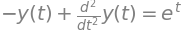

In [4]:
eq


In [5]:
σ = Function('ч')
dsolve(Eq(σ(t).diff(t, t) - σ(t), exp(t)), σ(t))


In [6]:
from sympy import Symbol, nsolve


In [7]:
from sympy import solve
x, y, sigma, mu, delta, alpha, beta, ro, eta, b, lambd = symbols(
    'x y σ μ δ α β ρ η b λ')
sigma_c = 0.11
ro_c = 1.31
eta_c = 20
alpha_c = 1.36
beta_c = 0.002
delta_c = 0.37
mu_c = 0.5
b_c = 0
dxdt = sigma + ro*x*y/(eta + y) - mu*x*y - delta*x
dydt = alpha*y*(1-beta*y)-x*y-(b*y)/(1+y)
concrete_params = {ro: ro_c, sigma: sigma_c, eta: eta_c, b: b_c,
                   alpha: alpha_c, beta: beta_c, mu: mu_c, delta: delta_c}
muless_params = dict(concrete_params)
del muless_params[mu]


### Точки равновесия

In [8]:
xc, yc = nsolve((dxdt.evalf(subs=concrete_params),
                dydt.evalf(subs=concrete_params)), [x, y], (-1, 1))
eqilibrium = {x: xc, y: yc}
xc, yc


In [9]:
# dxdt.evalf(subs=concrete_subs), dydt.evalf(subs=concrete_subs)


### Матрица первого приближения

#### Частные производные

In [10]:
dfdx = diff(dxdt, x)
dfdy = diff(dxdt, y)
dgdx = diff(dydt, x)
dgdy = diff(dydt, y)


In [11]:
display(Math('\dfrac{df}{dx} = ' + latex(dfdx)))
display(Math('\dfrac{df}{dy} = ' + latex(dfdy)))
display(Math('\dfrac{dg}{dx} = ' + latex(dgdx)))
display(Math('\dfrac{dg}{dy} = ' + latex(dfdy)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Частные производные в точке равновесия

In [12]:
a11 = dfdx.evalf(subs={**eqilibrium, **muless_params})
a12 = dfdy.evalf(subs={**eqilibrium, **muless_params})
a21 = dgdx.evalf(subs={**eqilibrium, **muless_params})
a22 = dgdy.evalf(subs={**eqilibrium, **muless_params})


In [13]:
jacob_matrix = Matrix([[a11, a12], [a21, a22]])
jacob_matrix


⎡-1.05550514093991e-31⋅μ - 0.37  0.019472972972973 - 0.297297297297297⋅μ⎤
⎢                                                                       ⎥
⎣    -1.05550514093991e-31                   1.0627027027027            ⎦

In [14]:
j = jacob_matrix - np.eye(2) * lambd
j


⎡-λ - 1.05550514093991e-31⋅μ - 0.37  0.019472972972973 - 0.297297297297297⋅μ⎤
⎢                                                                           ⎥
⎣      -1.05550514093991e-31                   1.0627027027027 - λ          ⎦

In [15]:
j.det()


In [16]:
lam1, lam2 = solve(j.det(), lambd)


In [17]:
lam1


In [18]:
lam2
